In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pysta
import stc
%load_ext autoreload
%autoreload 2

# run for all cells (OFF LINE)

run 
```
python3 stc_batch.py [DATASET]
```

datasets
* 20180618
* 20180621
* 20180626
* 20180828

## load data

In [7]:
# load data

# load stim and spike data
dataset_name = "20180626"
dataset_filename = "data/{}.mat".format(dataset_name)

stim, spike_train, info = pysta.load_data(dataset_filename)

channel_names = [ch.replace("ch_","") for ch in info["channel_names"]]
# info["channel_names"]

# load cell type
cell_type = pd.read_csv("data/{}_cell_type.csv".format(dataset_name))


List of arrays in this file: 
 <KeysViewHDF5 ['#refs#', 'channel_names', 'height', 'sampling_rate', 'spike_train', 'stim', 'width']>
Shape of the array stim:  (64, 9000)
Shape of the array spike_train:  (156, 9000)
length of the list channel_names:  156
sampling_rate:  10.0


## result - eigenvalues

In [9]:
# read eigenvalus
all_eig_values = dict()
# eigen_values = list()
largest_eig_values = list()

folder_name = "{}_stc_tap8".format(dataset_name)
#folder_name = "stc_tap10_center_half"
for channel_name in channel_names: #info["channel_names"]:
    filename = "{}/ch_{}_eig_val.txt".format(folder_name,channel_name)
    eig_val = np.loadtxt(filename)
    
    all_eig_values[channel_name] = eig_val
#     eigen_values.append(eig_val)
    largest_eig_values.append(eig_val[0])
    
    #print(channel_name)
# plt.hist(largest_eig_values)

# all_eig_values

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f01758a56d8>,
      dtype=object)

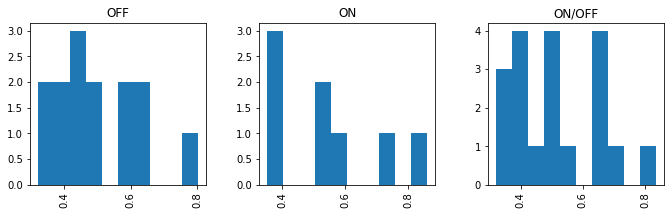

In [10]:
# convert to DataFrame
eig = pd.DataFrame({"channel_name": channel_names, "largest_eig_values":largest_eig_values})

results = cell_type.merge(eig, on="channel_name")
results.hist(column=["largest_eig_values"], by=["cell_type"], layout=(1,3), figsize=(11,3))


Text(0.5, 1.0, 'ON/OFF')

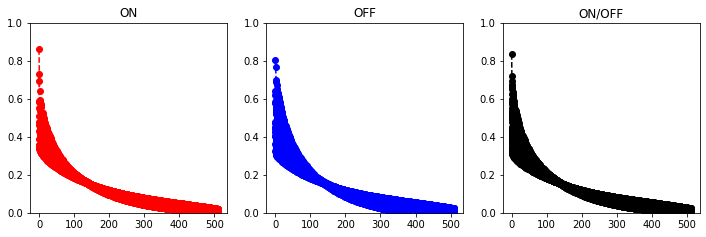

In [11]:
# plot eigenvalues for cell type

plt.figure(figsize=(12,3.5))
ax=plt.subplot(131)
for channel_name in cell_type.loc[cell_type["cell_type"] == "ON"]["channel_name"]:
    #print(channel_name)    
    plt.plot(all_eig_values[channel_name], 'or--')
ax.set_ylim(0, 1)
plt.title("ON")

ax=plt.subplot(132)    
for channel_name in cell_type.loc[cell_type["cell_type"] == "OFF"]["channel_name"]:
    #print(channel_name)    
    plt.plot(all_eig_values[channel_name], 'ob--')
ax.set_ylim(0, 1)    
plt.title("OFF")

ax=plt.subplot(133)    
for channel_name in cell_type.loc[cell_type["cell_type"] == "ON/OFF"]["channel_name"]:
    #print(channel_name)    
    plt.plot(all_eig_values[channel_name], 'ok--')
ax.set_ylim(0, 1)    
plt.title("ON/OFF")

## result - kurtosis

,channel_name,kurtosis
0,12a,0.107259
1,12b,0.679392
2,12c,-0.497434
3,13a,0.078079
4,13b,6.185805
...,...,...
151,86c,2.206497
152,86d,6.641754
153,87a,0.064257
154,87b,0.051199


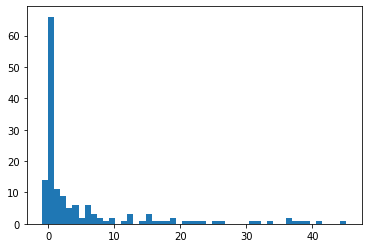

In [12]:
# load kurtosis
#tap = 5
Ks = np.loadtxt("{}/kurtosis.txt".format(folder_name))
plt.hist(Ks,50)

# store into a DataFrame
# remove "ch_" from channel names
kurtosis = pd.DataFrame({"channel_name": channel_names, "kurtosis": Ks})

kurtosis



In [15]:
# merge with cell_type
#cell_type
results = results.merge(kurtosis, on="channel_name", how="outer")
#results = cell_type.merge(kurtosis, on="channel_name")
# results.hist(column=["kurtosis"], by=["cell_type"], layout=(1,3), figsize=(12,3.5))

In [13]:
results

,channel_name,cell_type,largest_eig_values
0,12b,OFF,0.473982
1,14a,OFF,0.617364
2,14b,OFF,0.575853
3,17a,ON,0.350985
4,21a,OFF,0.402373
5,22a,ON/OFF,0.523932
6,22b,ON/OFF,0.498135
7,23b,ON/OFF,0.670508
8,25a,ON,0.357755
9,25b,ON/OFF,0.660372


In [14]:
k_on = results.loc[results["cell_type"]=="ON","kurtosis"]
k_off = results.loc[results["cell_type"]=="OFF","kurtosis"]
k_on_off = results.loc[results["cell_type"]=="ON/OFF","kurtosis"]

bins = np.linspace(-1,1,21)
# plt.hist(k_on, bins)
# plt.hist(k_off, bins)
# plt.hist(k_on_off, bins)

# plot separately 
plt.figure(figsize=(8,12))
plt.subplot(3,1,1)
plt.hist(k_on, bins)
plt.title("ON")
# plt.xlabel("kurtosis")
plt.ylabel("count")

plt.subplot(3,1,2)
plt.hist(k_off, bins)
plt.title("OFF")
# plt.xlabel("kurtosis")
plt.ylabel("count")

plt.subplot(3,1,3)
plt.hist(k_on_off, bins)
plt.title("ON/OFF")
plt.xlabel("kurtosis")
plt.ylabel("count")

KeyError: 'kurtosis'

In [ ]:
results.loc[results["kurtosis"]<0]

## eigenvalues & kurtosis


In [ ]:
plt.scatter(results["largest_eig_values"], results["kurtosis"])
plt.xlabel("largest eigenvalue")
plt.ylabel("kurtosis")

In [ ]:
# plot for each cell type
results_on = results.loc[results["cell_type"]=="ON"]
results_off = results.loc[results["cell_type"]=="OFF"]
results_on_off = results.loc[results["cell_type"]=="ON/OFF"]

# plt.figure(figsize=(12,3))
# plt.subplot(131)
ax=plt.scatter(results_on["largest_eig_values"], results_on["kurtosis"], marker="o", alpha=0.8)
plt.xlabel("largest eigenvalue")
plt.ylabel("kurtosis")

# plt.subplot(132)
plt.scatter(results_off["largest_eig_values"], results_off["kurtosis"], marker="s", alpha=0.8)
plt.xlabel("largest eigenvalue")
plt.ylabel("kurtosis")

# plt.subplot(133)
plt.scatter(results_on_off["largest_eig_values"], results_on_off["kurtosis"], marker="*", alpha=0.8)
plt.xlabel("largest eigenvalue")
plt.ylabel("kurtosis")

plt.legend(["ON", "OFF", "ON/OFF"])

In [ ]:
plt.scatter(results_on_off["largest_eig_values"], results_on_off["kurtosis"], marker="o")# , alpha=0.8)
plt.xlabel("largest eigenvalue")
plt.ylabel("kurtosis")

# plt.legend(["ON", "OFF", "ON/OFF"])

In [ ]:
results_on_off

In [ ]:
# plot eigenvalues for ON/OFF cells

def plot_eigenvalues(all_eigen_values, channel_names):
    
    num_subplots=len(channel_names)
    num_row = int(np.ceil(np.sqrt(num_subplots)))
    num_col = int(np.ceil(num_subplots / num_row))

    plt.figure(figsize=(20,20))
    for i, channel_name in enumerate(channel_names):
        plt.subplot(num_row, num_col,i+1)
        plt.plot(all_eig_values[channel_name],"o:")
        plt.title(channel_name)

plot_eigenvalues(all_eig_values, results_on_off["channel_name"])
plt.savefig("{}/eigenvalues_on_off.png".format(folder_name))

In [ ]:
plot_eigenvalues(all_eig_values, results_on["channel_name"])
plt.savefig("{}/eigenvalues_on.png".format(folder_name))

In [ ]:
plot_eigenvalues(all_eig_values, results_off["channel_name"])
plt.savefig("{}/eigenvalues_off.png".format(folder_name))